<a href="https://www.kaggle.com/code/gktugm/custom-dataset?scriptVersionId=128103563" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [50]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import itertools
import scipy.ndimage
from skimage import data, io, filters
import skimage
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [51]:
Main_PNG_Path = Path("../input/vehicle-detection-image-set/data")

In [52]:
PNG_Path = list(Main_PNG_Path.glob(r"*/*.png"))

In [53]:
PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],PNG_Path))

In [54]:
PNG_Path_Series = pd.Series(PNG_Path,name="PNG").astype(str)
PNG_Labels_Series = pd.Series(PNG_Labels,name="CATEGORY")

In [55]:
Main_Data = pd.concat([PNG_Path_Series,PNG_Labels_Series],axis=1)

In [56]:
print(Main_Data.head(-1))

                                                     PNG      CATEGORY
0      ../input/vehicle-detection-image-set/data/vehi...      vehicles
1      ../input/vehicle-detection-image-set/data/vehi...      vehicles
2      ../input/vehicle-detection-image-set/data/vehi...      vehicles
3      ../input/vehicle-detection-image-set/data/vehi...      vehicles
4      ../input/vehicle-detection-image-set/data/vehi...      vehicles
...                                                  ...           ...
17754  ../input/vehicle-detection-image-set/data/non-...  non-vehicles
17755  ../input/vehicle-detection-image-set/data/non-...  non-vehicles
17756  ../input/vehicle-detection-image-set/data/non-...  non-vehicles
17757  ../input/vehicle-detection-image-set/data/non-...  non-vehicles
17758  ../input/vehicle-detection-image-set/data/non-...  non-vehicles

[17759 rows x 2 columns]


In [58]:
Main_Data["CATEGORY"].replace({"non-vehicles":"no_vehicles"},inplace=True)

In [59]:
print(Main_Data.head(-1))

                                                     PNG     CATEGORY
0      ../input/vehicle-detection-image-set/data/vehi...     vehicles
1      ../input/vehicle-detection-image-set/data/vehi...     vehicles
2      ../input/vehicle-detection-image-set/data/vehi...     vehicles
3      ../input/vehicle-detection-image-set/data/vehi...     vehicles
4      ../input/vehicle-detection-image-set/data/vehi...     vehicles
...                                                  ...          ...
17754  ../input/vehicle-detection-image-set/data/non-...  no_vehicles
17755  ../input/vehicle-detection-image-set/data/non-...  no_vehicles
17756  ../input/vehicle-detection-image-set/data/non-...  no_vehicles
17757  ../input/vehicle-detection-image-set/data/non-...  no_vehicles
17758  ../input/vehicle-detection-image-set/data/non-...  no_vehicles

[17759 rows x 2 columns]


In [60]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

In [61]:
print(Main_Data.head(-1))

                                                     PNG     CATEGORY
0      ../input/vehicle-detection-image-set/data/non-...  no_vehicles
1      ../input/vehicle-detection-image-set/data/non-...  no_vehicles
2      ../input/vehicle-detection-image-set/data/vehi...     vehicles
3      ../input/vehicle-detection-image-set/data/vehi...     vehicles
4      ../input/vehicle-detection-image-set/data/non-...  no_vehicles
...                                                  ...          ...
17754  ../input/vehicle-detection-image-set/data/vehi...     vehicles
17755  ../input/vehicle-detection-image-set/data/non-...  no_vehicles
17756  ../input/vehicle-detection-image-set/data/non-...  no_vehicles
17757  ../input/vehicle-detection-image-set/data/vehi...     vehicles
17758  ../input/vehicle-detection-image-set/data/non-...  no_vehicles

[17759 rows x 2 columns]


In [62]:
plt.style.use("classic")

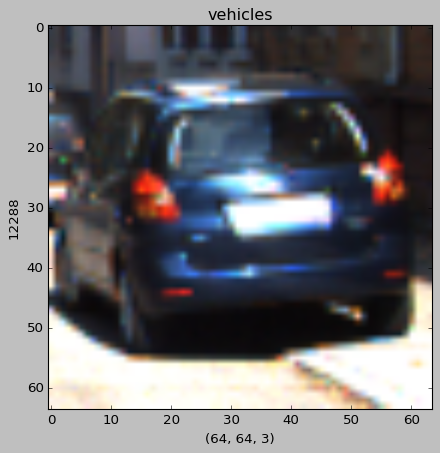

In [63]:
Example_I = cv2.imread(Main_Data["PNG"][44])
Example_I = cv2.cvtColor(Example_I,cv2.COLOR_BGR2RGB)
plt.xlabel(Example_I.shape)
plt.ylabel(Example_I.size)
plt.title(Main_Data["CATEGORY"][44])
plt.imshow(Example_I)

In [64]:
Example_I = cv2.imread(Main_Data["PNG"][2])
Example_I = cv2.cvtColor(Example_I,cv2.COLOR_BGR2RGB)
plt.xlabel(Example_I.shape)
plt.ylabel(Example_I.size)
plt.title(Main_Data["CATEGORY"][2])
plt.imshow(Example_I)

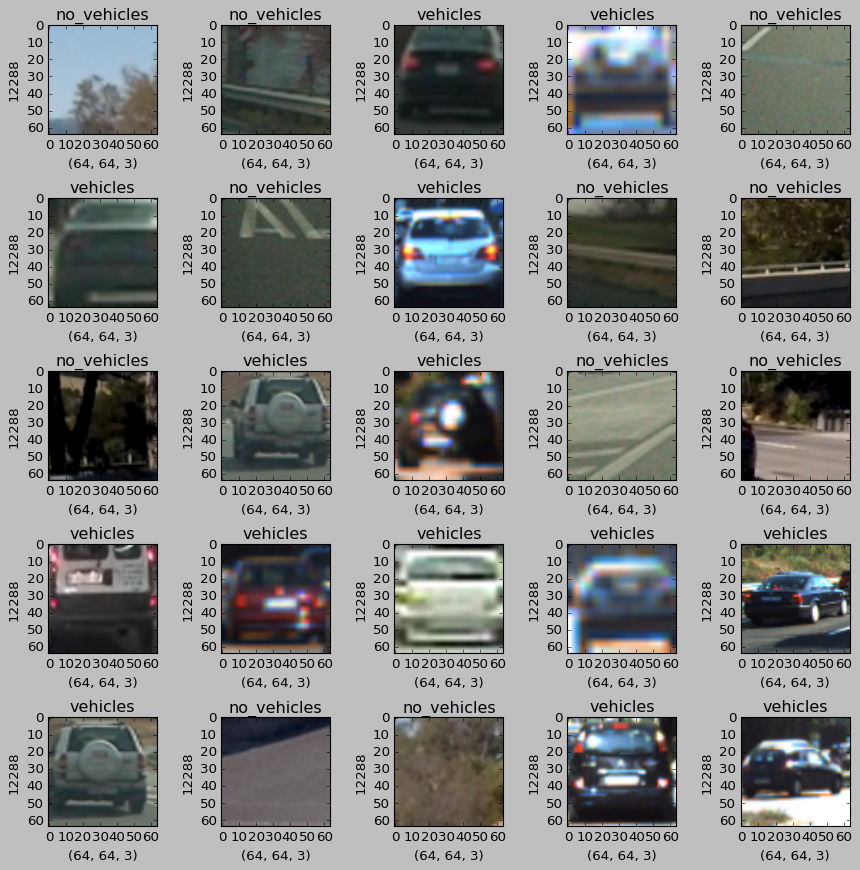

In [65]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = Main_Data["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(Main_Data["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

In [66]:
Non_V_Img = Main_Data[Main_Data["CATEGORY"] == "no_vehicles"]
V_Img = Main_Data[Main_Data["CATEGORY"] == "vehicles"]

Non_V_Img = Non_V_Img.reset_index()
V_Img = V_Img.reset_index()

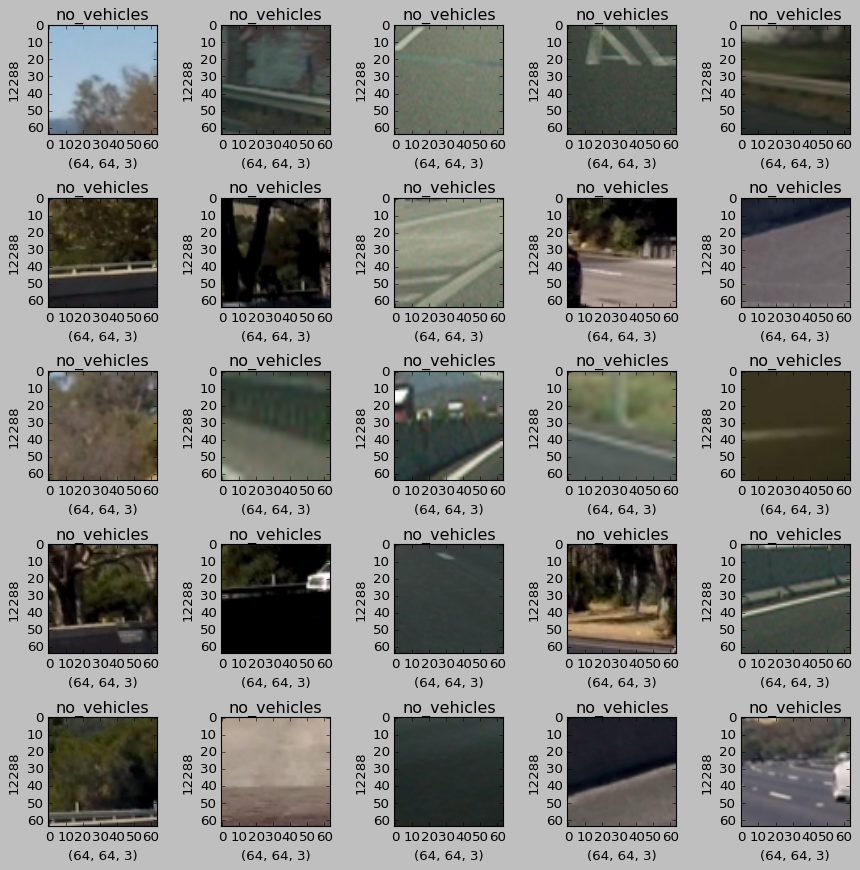

In [67]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = Non_V_Img["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(Non_V_Img["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

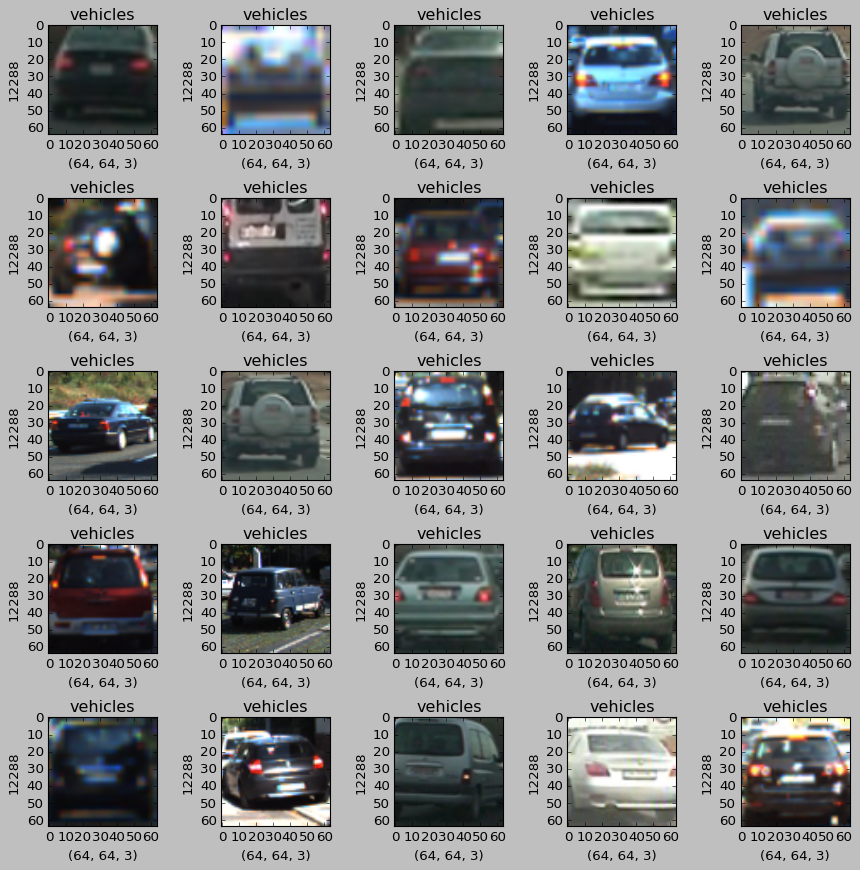

In [68]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = V_Img["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(V_Img["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

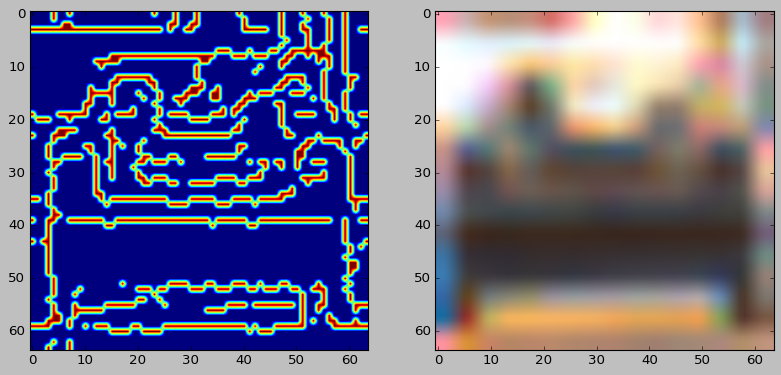

In [69]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][1])
C_IMG = cv2.Canny(E_IMG,10,85)

axis[0].imshow(C_IMG)
axis[1].imshow(E_IMG)

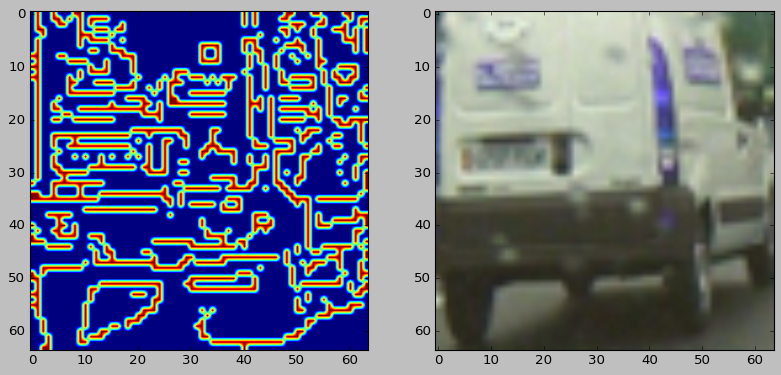

In [70]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][100])
C_IMG = cv2.Canny(E_IMG,10,85)

axis[0].imshow(C_IMG)
axis[1].imshow(E_IMG)

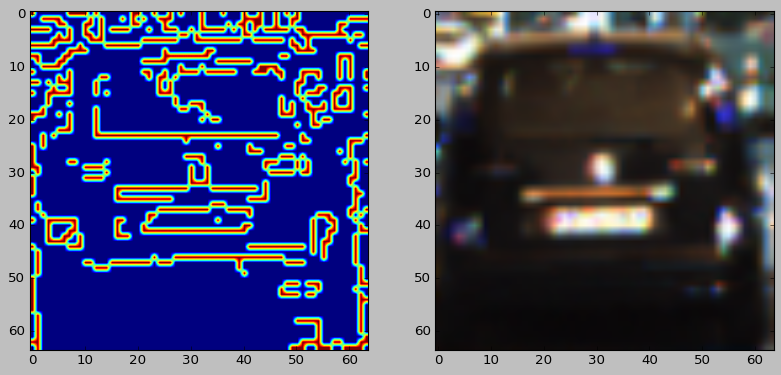

In [71]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][147])
C_IMG = cv2.Canny(E_IMG,10,85)

axis[0].imshow(C_IMG)
axis[1].imshow(E_IMG)

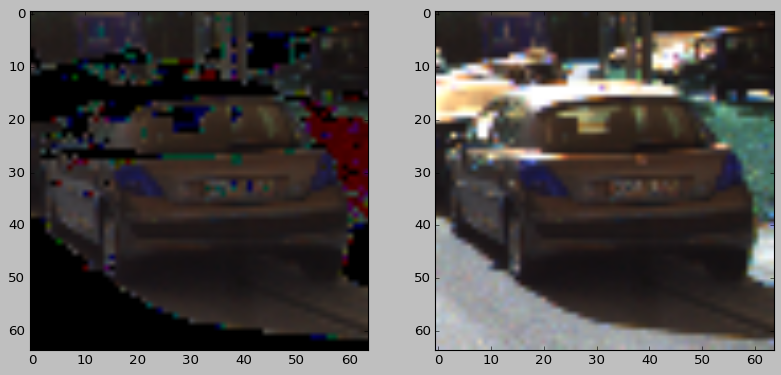

In [72]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][47])
_,Threshold_I = cv2.threshold(E_IMG,90,255,cv2.THRESH_TOZERO_INV)


axis[0].imshow(Threshold_I)
axis[1].imshow(E_IMG)

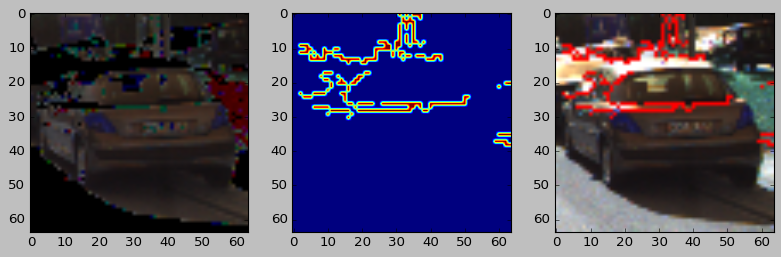

In [73]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][47])
_,Threshold_I = cv2.threshold(E_IMG,90,255,cv2.THRESH_TOZERO_INV)
C_IMG = cv2.Canny(Threshold_I,90,450)
contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
Draw_Img = cv2.drawContours(E_IMG,contours,-1,(255,0,0),1)


axis[0].imshow(Threshold_I)
axis[1].imshow(C_IMG)
axis[2].imshow(E_IMG)

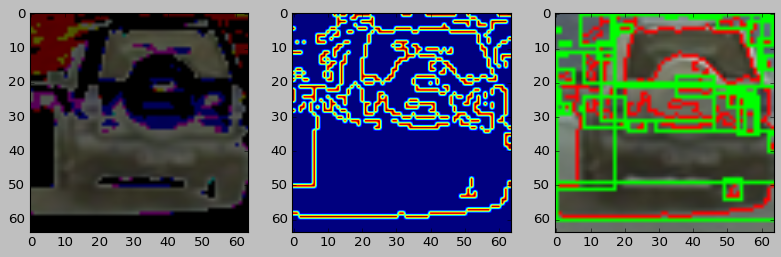

In [74]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][4])
_,Threshold_I = cv2.threshold(E_IMG,90,255,cv2.THRESH_TOZERO_INV)
C_IMG = cv2.Canny(Threshold_I,90,450)
contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
Draw_Img = cv2.drawContours(E_IMG,contours,-1,(255,0,0),1)

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(Draw_Img,(x,y),(x+w,y+h),(0,255,0),1)

axis[0].imshow(Threshold_I)
axis[1].imshow(C_IMG)
axis[2].imshow(E_IMG)

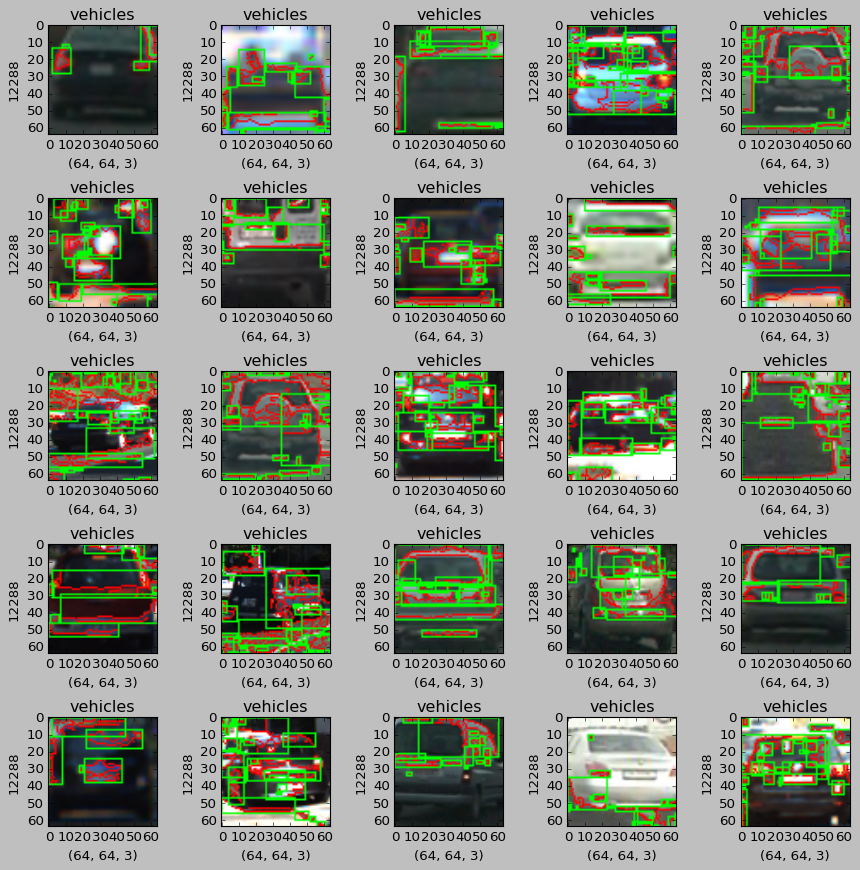

In [75]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = V_Img["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    _,Thre_Img = cv2.threshold(Exp_Im,100,255,cv2.THRESH_TOZERO_INV)
    C_IMG = cv2.Canny(Thre_Img,90,450)
    contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    Draw_Img = cv2.drawContours(Exp_Im,contours,-1,(255,0,0),1)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(Draw_Img,(x,y),(x+w,y+h),(0,255,0),1)
        
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(V_Img["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

In [76]:
Test_Image_Generator = ImageDataGenerator(rescale=1./255)

In [77]:
Train_IMG_Generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=25,
                                        shear_range=0.2,
                                        zoom_range=0.1,
                                        brightness_range=[0.2,0.8],
                                        horizontal_flip=True,
                                        validation_split=0.1)

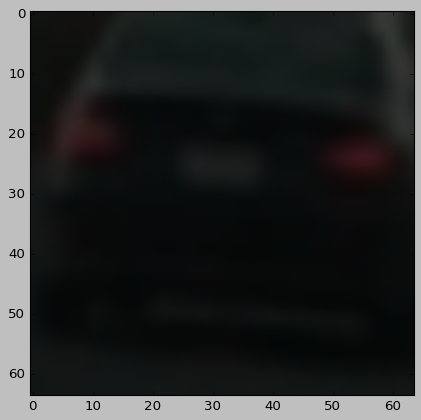

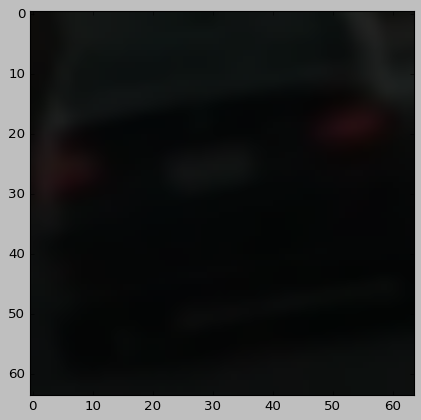

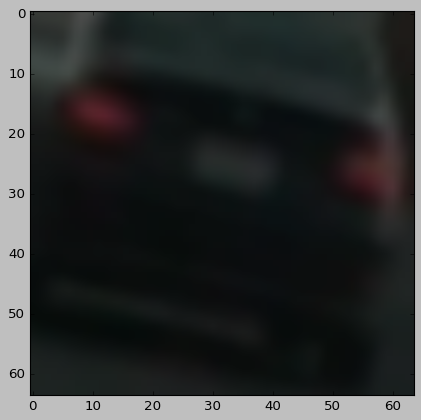

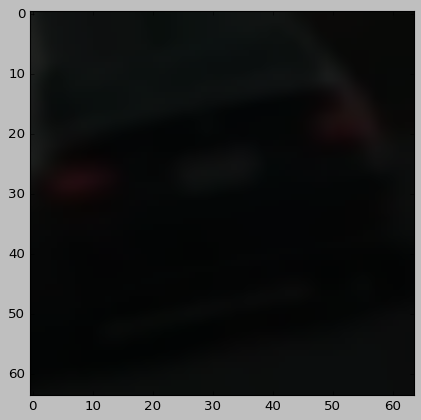

In [78]:
Example_Image = Main_Data["PNG"][2]
Load_Image = tf.keras.preprocessing.image.load_img(Example_Image,target_size=(64,64))
Array_Image = tf.keras.preprocessing.image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,)+Array_Image.shape)

i = 0

for batch in Train_IMG_Generator.flow(Array_Image,batch_size=32):
    plt.figure(i)
    Image = plt.imshow(tf.keras.preprocessing.image.img_to_array(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [79]:
Train_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=Main_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                    target_size=(64,64),
                                                   class_mode="binary",
                                                   subset="training")

Found 15984 validated image filenames belonging to 2 classes.


In [80]:
Validaiton_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=Main_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                    target_size=(64,64),
                                                   class_mode="binary",
                                                   subset="validation")

Found 1776 validated image filenames belonging to 2 classes.


In [81]:
Test_Set = Test_Image_Generator.flow_from_dataframe(dataframe=Main_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                    target_size=(64,64),
                                                   class_mode="binary",
                                                   shuffle=False)

Found 17760 validated image filenames belonging to 2 classes.


In [82]:
print("TRAIN: ")
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validaiton_Set.class_indices)
print(Validaiton_Set.classes[0:5])
print(Validaiton_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

TRAIN: 
{'no_vehicles': 0, 'vehicles': 1}
[0, 0, 1, 1, 1]
(64, 64, 3)
------------------------------------------------------------
VALIDATION: 
{'no_vehicles': 0, 'vehicles': 1}
[0, 0, 1, 1, 0]
(64, 64, 3)
------------------------------------------------------------
TEST: 
{'no_vehicles': 0, 'vehicles': 1}
[0, 0, 1, 1, 0]
(64, 64, 3)


In [83]:
Model = Sequential()

Model.add(SeparableConv2D(12,(3,3),activation="relu",
                 input_shape=(64,64,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(SeparableConv2D(24,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))


#
Model.add(TimeDistributed(Flatten()))
Model.add(Bidirectional(LSTM(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))
Model.add(Bidirectional(GRU(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))

#
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(1,activation="sigmoid"))


In [84]:
print(Model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_2 (Separab  (None, 62, 62, 12)       75        
 leConv2D)                                                       
                                                                 
 batch_normalization_1 (Batc  (None, 62, 62, 12)       48        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 12)       0         
 2D)                                                             
                                                                 
 separable_conv2d_3 (Separab  (None, 31, 31, 24)       420       
 leConv2D)                                                       
                                                                 
 dropout_2 (Dropout)         (None, 31, 31, 24)       

In [85]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [86]:
Model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [87]:
CNN_Model = Model.fit(Train_Set,
                      validation_data=Validaiton_Set,
                      callbacks=Call_Back,
                      epochs=10)

Epoch 1/10


2023-05-03 02:07:15.197680: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


500/500 [==============================] - 192s 359ms/step - loss: 0.2038 - accuracy: 0.9135 - val_loss: 0.5131 - val_accuracy: 0.8035
Epoch 2/10
500/500 [==============================] - 183s 365ms/step - loss: 0.0895 - accuracy: 0.9672 - val_loss: 0.0525 - val_accuracy: 0.9792
Epoch 3/10
500/500 [==============================] - 180s 360ms/step - loss: 0.0688 - accuracy: 0.9748 - val_loss: 0.0573 - val_accuracy: 0.9780
Epoch 4/10
500/500 [==============================] - 178s 356ms/step - loss: 0.0611 - accuracy: 0.9776 - val_loss: 0.0436 - val_accuracy: 0.9848
Epoch 5/10
500/500 [==============================] - 178s 357ms/step - loss: 0.0541 - accuracy: 0.9810 - val_loss: 0.0379 - val_accuracy: 0.9899
Epoch 6/10
500/500 [==============================] - 179s 358ms/step - loss: 0.0473 - accuracy: 0.9824 - val_loss: 0.0524 - val_accuracy: 0.9825
Epoch 7/10
500/500 [==============================] - 177s 354ms/step - loss: 0.0473 - accuracy: 0.9839 - val_loss: 0.0520 - val_accura

In [88]:
Model.save("./Last_Model")

In [89]:
Model.save("Prediction_Model.h5")

In [90]:
Model.save_weights("Model_Weights.h5")

In [91]:
Model_Results = Model.evaluate(Test_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

555/555 [==============================] - 32s 57ms/step - loss: 0.0521 - accuracy: 0.9823
LOSS:  0.0521
ACCURACY:  0.98


<AxesSubplot: >

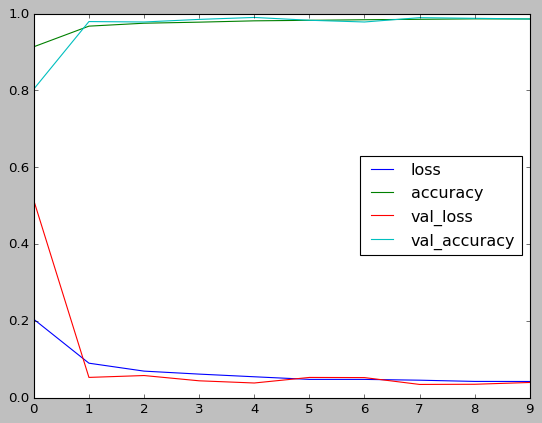

In [92]:
Grap_Data = pd.DataFrame(CNN_Model.history)
Grap_Data.plot()

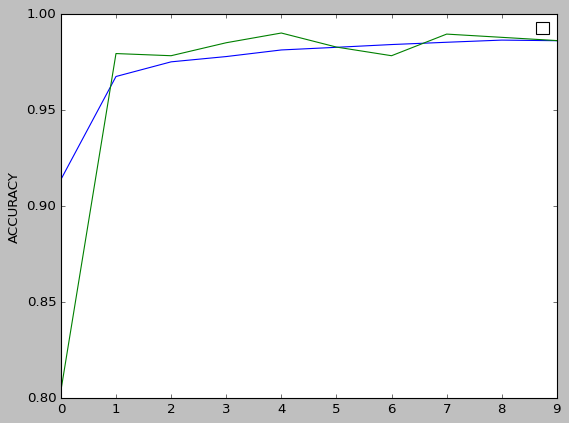

In [93]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

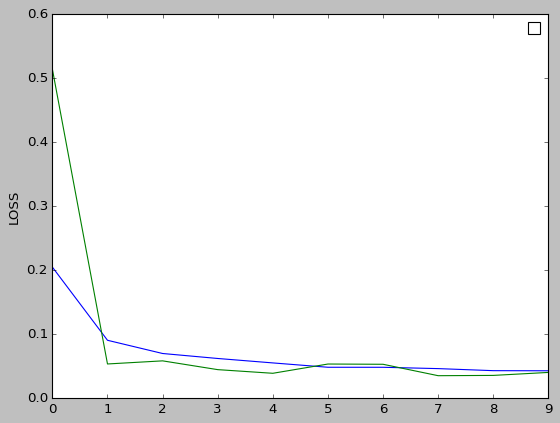

In [94]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [95]:
Test_Prediction = Model.predict(Test_Set)
Test_Prediction_Class = np.argmax(Test_Prediction,axis=1)

555/555 [==============================] - 32s 57ms/step


In [96]:
print(Test_Prediction)

[[2.6266887e-06]
 [6.6447660e-02]
 [1.0000000e+00]
 ...
 [9.9936837e-01]
 [1.0935863e-04]
 [1.6121843e-01]]


In [97]:
Test_Prediction = Test_Prediction.argmax(axis=-1)

In [98]:
print(Test_Prediction)

[0 0 0 ... 0 0 0]


In [99]:
print(Test_Prediction_Class)

[0 0 0 ... 0 0 0]


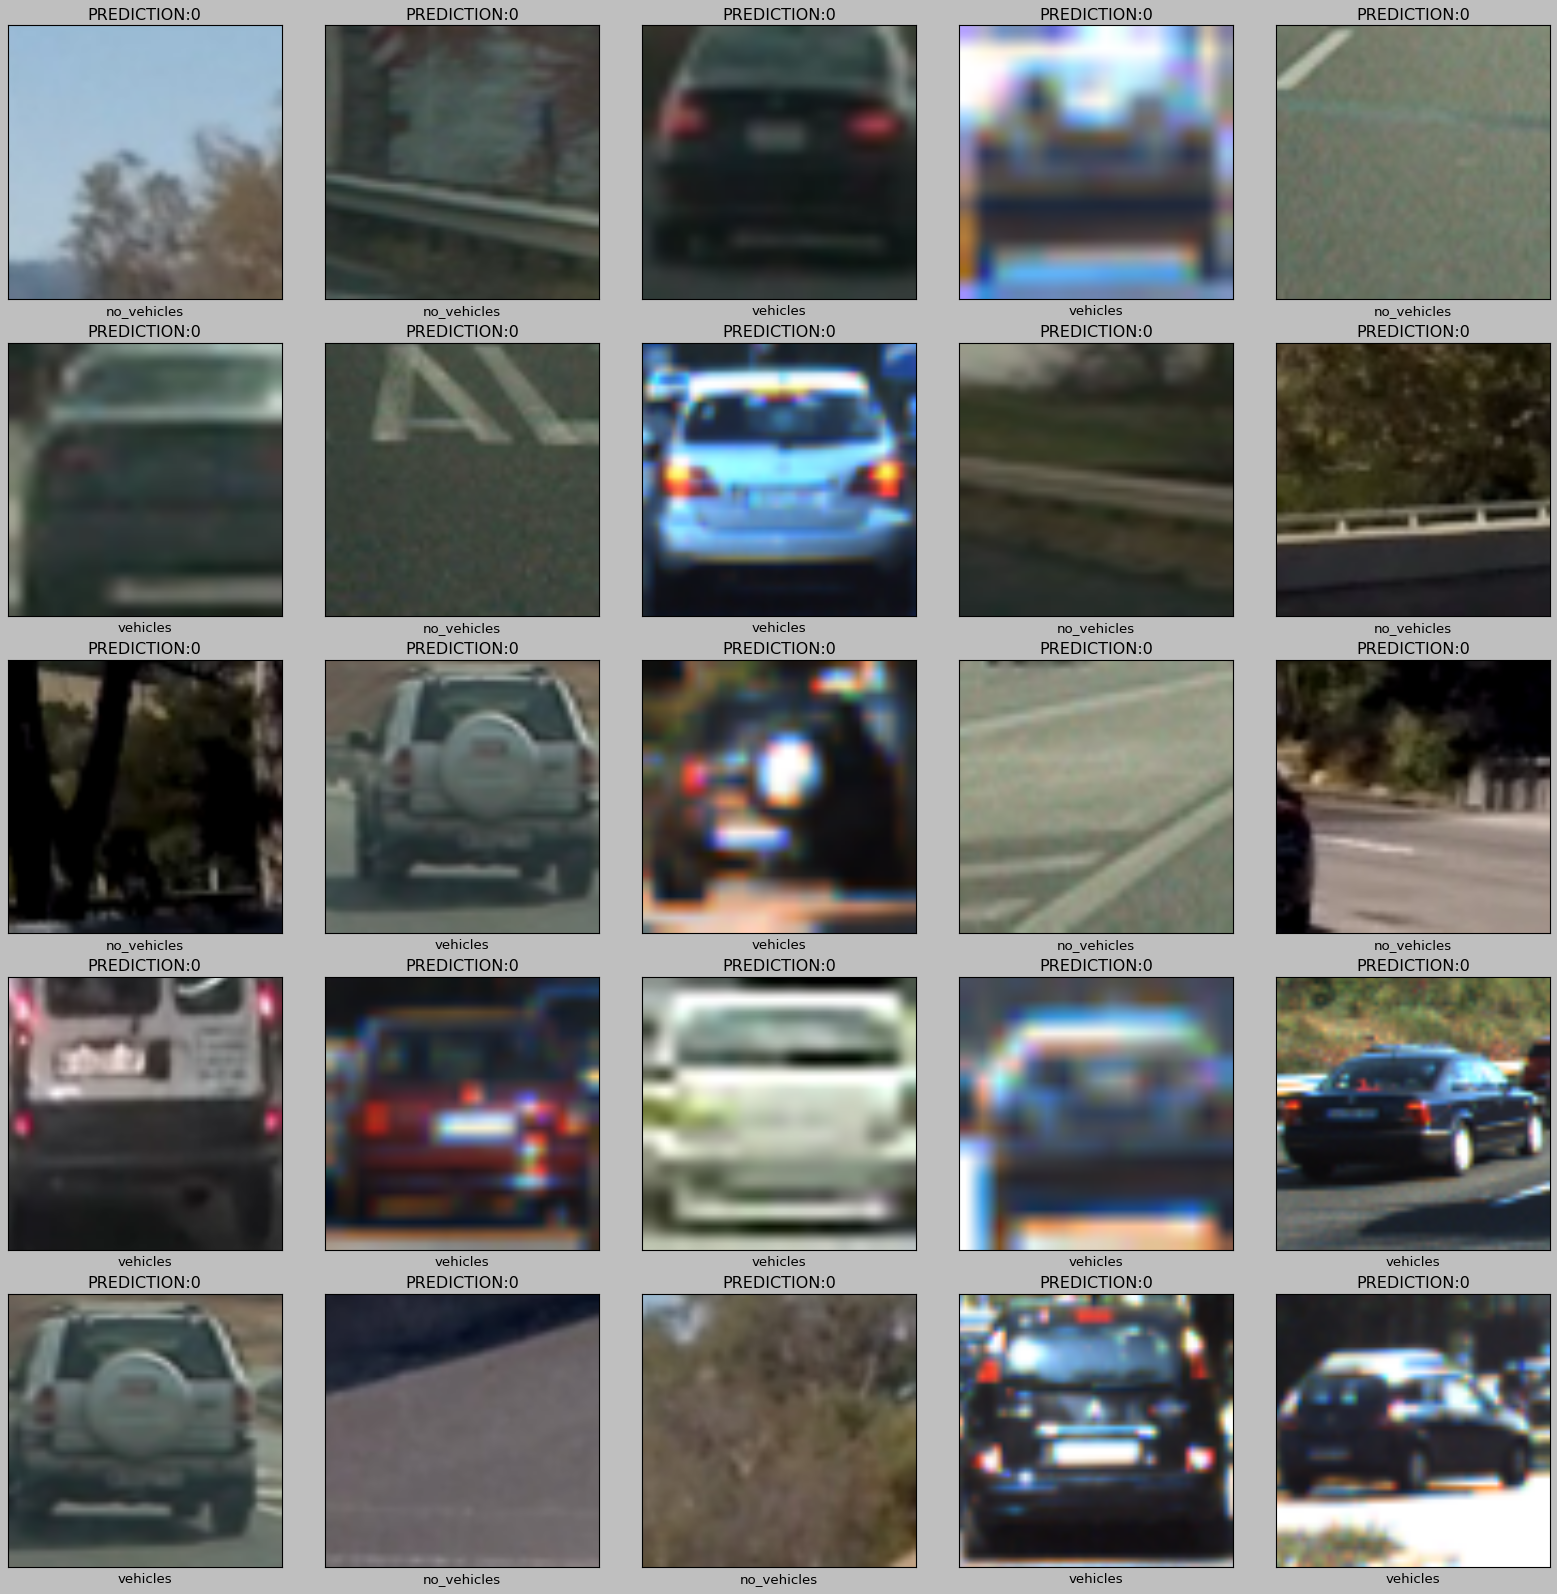

In [101]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["PNG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Test_Prediction_Class[i]}")
    ax.set_xlabel(Main_Data["CATEGORY"].iloc[i])
plt.tight_layout()
plt.show()

In [116]:
v_img = "/kaggle/input/vehicle-detection-image-set/data/vehicles/1001.png"

In [118]:
non_v = "/kaggle/input/vehicle-detection-image-set/data/non-vehicles/extra1.png"

In [150]:
def searching_vehicle(img):
    Main_Img = cv2.imread(img)
    Array_Cr = np.asarray(Main_Img)
    Array_Cr = Array_Cr.reshape(1, Array_Cr.shape[0], Array_Cr.shape[1], Array_Cr.shape[2])
    heating = np.argmax(Model.predict(Array_Cr), axis=1)
    
    if heating[0] == 0:
        canny_Im = cv2.Canny(Main_Img, 90, 450)
        contours, _ = cv2.findContours(canny_Im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        Draw_Img = cv2.drawContours(Main_Img, contours, -1, (255, 0, 0), 1)
        plt.imshow(Draw_Img)
        
    


1/1 [==============================] - 0s 38ms/step


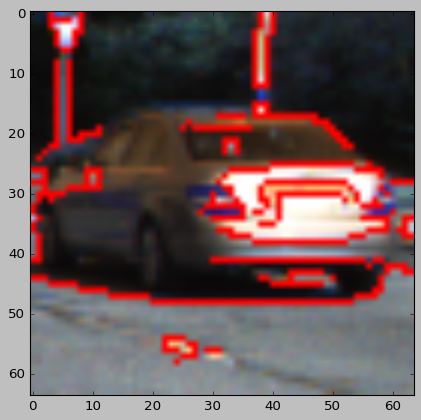

In [151]:
searching_vehicle(v_img)